In [166]:
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from rdkit.Chem import AllChem
import pickle

In [167]:
RESULTS_DIR = Path("results")
results_localretro = pd.read_csv(RESULTS_DIR / "localretro-backward.csv")
results_moltransformer = pd.read_csv(RESULTS_DIR / "moltransformer-backward.csv")
results_radicals = pd.read_csv(RESULTS_DIR / "radicals-backward.csv")

In [168]:
results_chemformer_mol = results_radicals[
    results_radicals["finetune"] == "mol"
].reset_index(drop=True)
results_chemformer_uspto = results_radicals[
    results_radicals["finetune"] == "uspto"
].reset_index(drop=True)
results_chemformer_pure = results_radicals[
    results_radicals["finetune"] == "pure"
].reset_index(drop=True)

In [169]:
def get_error(row):
    errs = []
    for i in range(5):
        errs.append(np.absolute(row[i] - row["mean"]))
    return sum(errs) / 5


def get_data(df):
    df = df.drop(["finetune", "cv"], axis=1).T
    df["mean"] = df.mean(axis=1)
    df["min"] = df.min(axis=1)
    df["max"] = df.max(axis=1)
    df["error"] = df.apply(get_error, axis=1)
    return df.reset_index()

In [170]:
results_moltransformer_acc = get_data(results_moltransformer)
results_localretro_acc = get_data(results_localretro)
results_chemformer_pure_acc = get_data(results_chemformer_pure)
results_chemformer_mol_acc = get_data(results_chemformer_mol)
results_chemformer_uspto_acc = get_data(results_chemformer_uspto)

In [171]:
def plot(x, y, color, error, data, label):
    plt.bar(x, data[y], color=color, label=label, width=0.6)
    plt.errorbar(x, data[y], yerr=data[error], fmt='.',
                 ecolor='k', elinewidth=1, capsize=0, ms=0)

In [172]:
colors = []
colors.append([i / 256 for i in (217, 163, 208)])
colors.append([i / 256 for i in (197, 224, 180)])
colors.append([i / 256 for i in (185, 205, 229)])
colors.append([i / 256 for i in (165, 225, 207)])
colors.append([i / 256 for i in (191, 204, 206)])
colors.append([i / 256 for i in (175, 215, 218)])

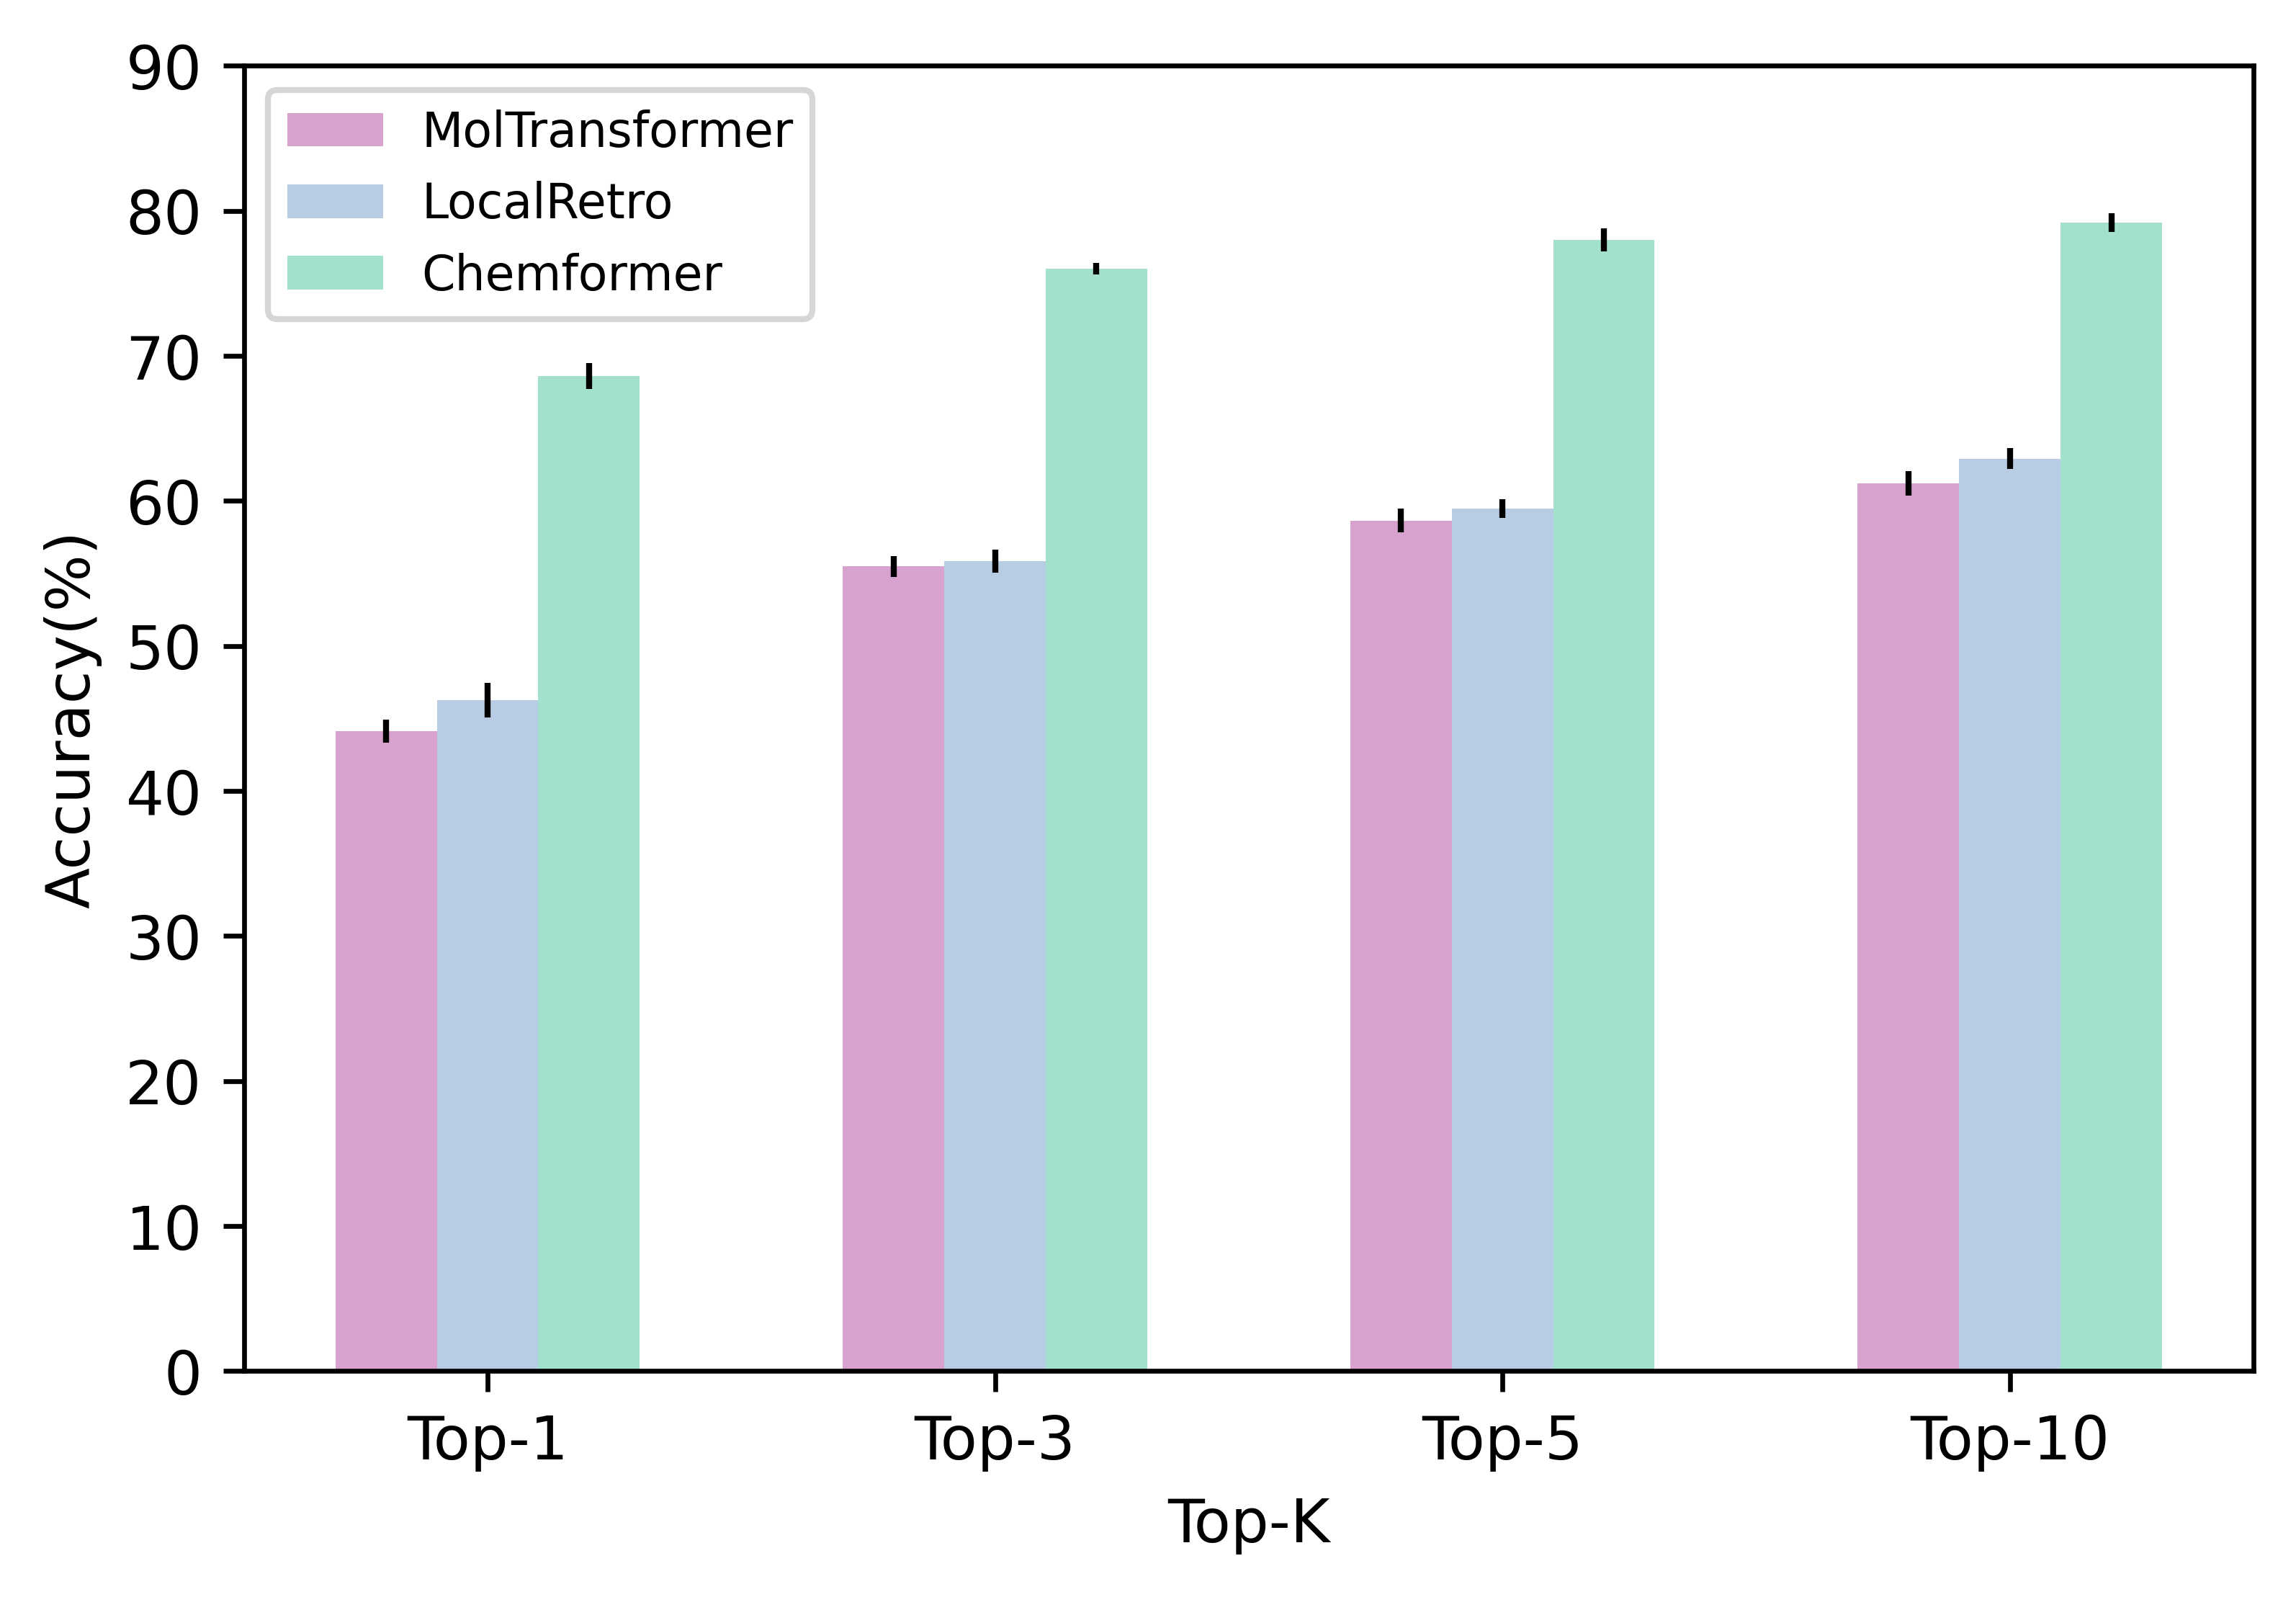

In [173]:
fig, ax = plt.subplots(dpi=600)
df_first = results_moltransformer_acc
df_secend = results_localretro_acc
df_third = results_chemformer_uspto_acc
first = df_first["mean"]
second = df_secend["mean"]
forth = df_third["mean"]

labels = [f"Top-{i}" for i in [1, 3, 5, 10]]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.2  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - 1 * width, first, width, label="MolTransformer", color=colors[0])
plt.bar(x, second, width, label="LocalRetro", color=colors[2])
plt.bar(x + 1 * width, forth, width, label="Chemformer", color=colors[3])

plt.errorbar(
    x - 1 * width,
    first,
    yerr=df_first["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x,
    second,
    yerr=df_secend["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x + 1 * width,
    forth,
    yerr=df_third["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol=False))
plt.ylabel("Accuracy(%)")
plt.xlabel("Top-K")
plt.ylim(0, 0.9)
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend(loc='upper left', fontsize=8)
plt.show()

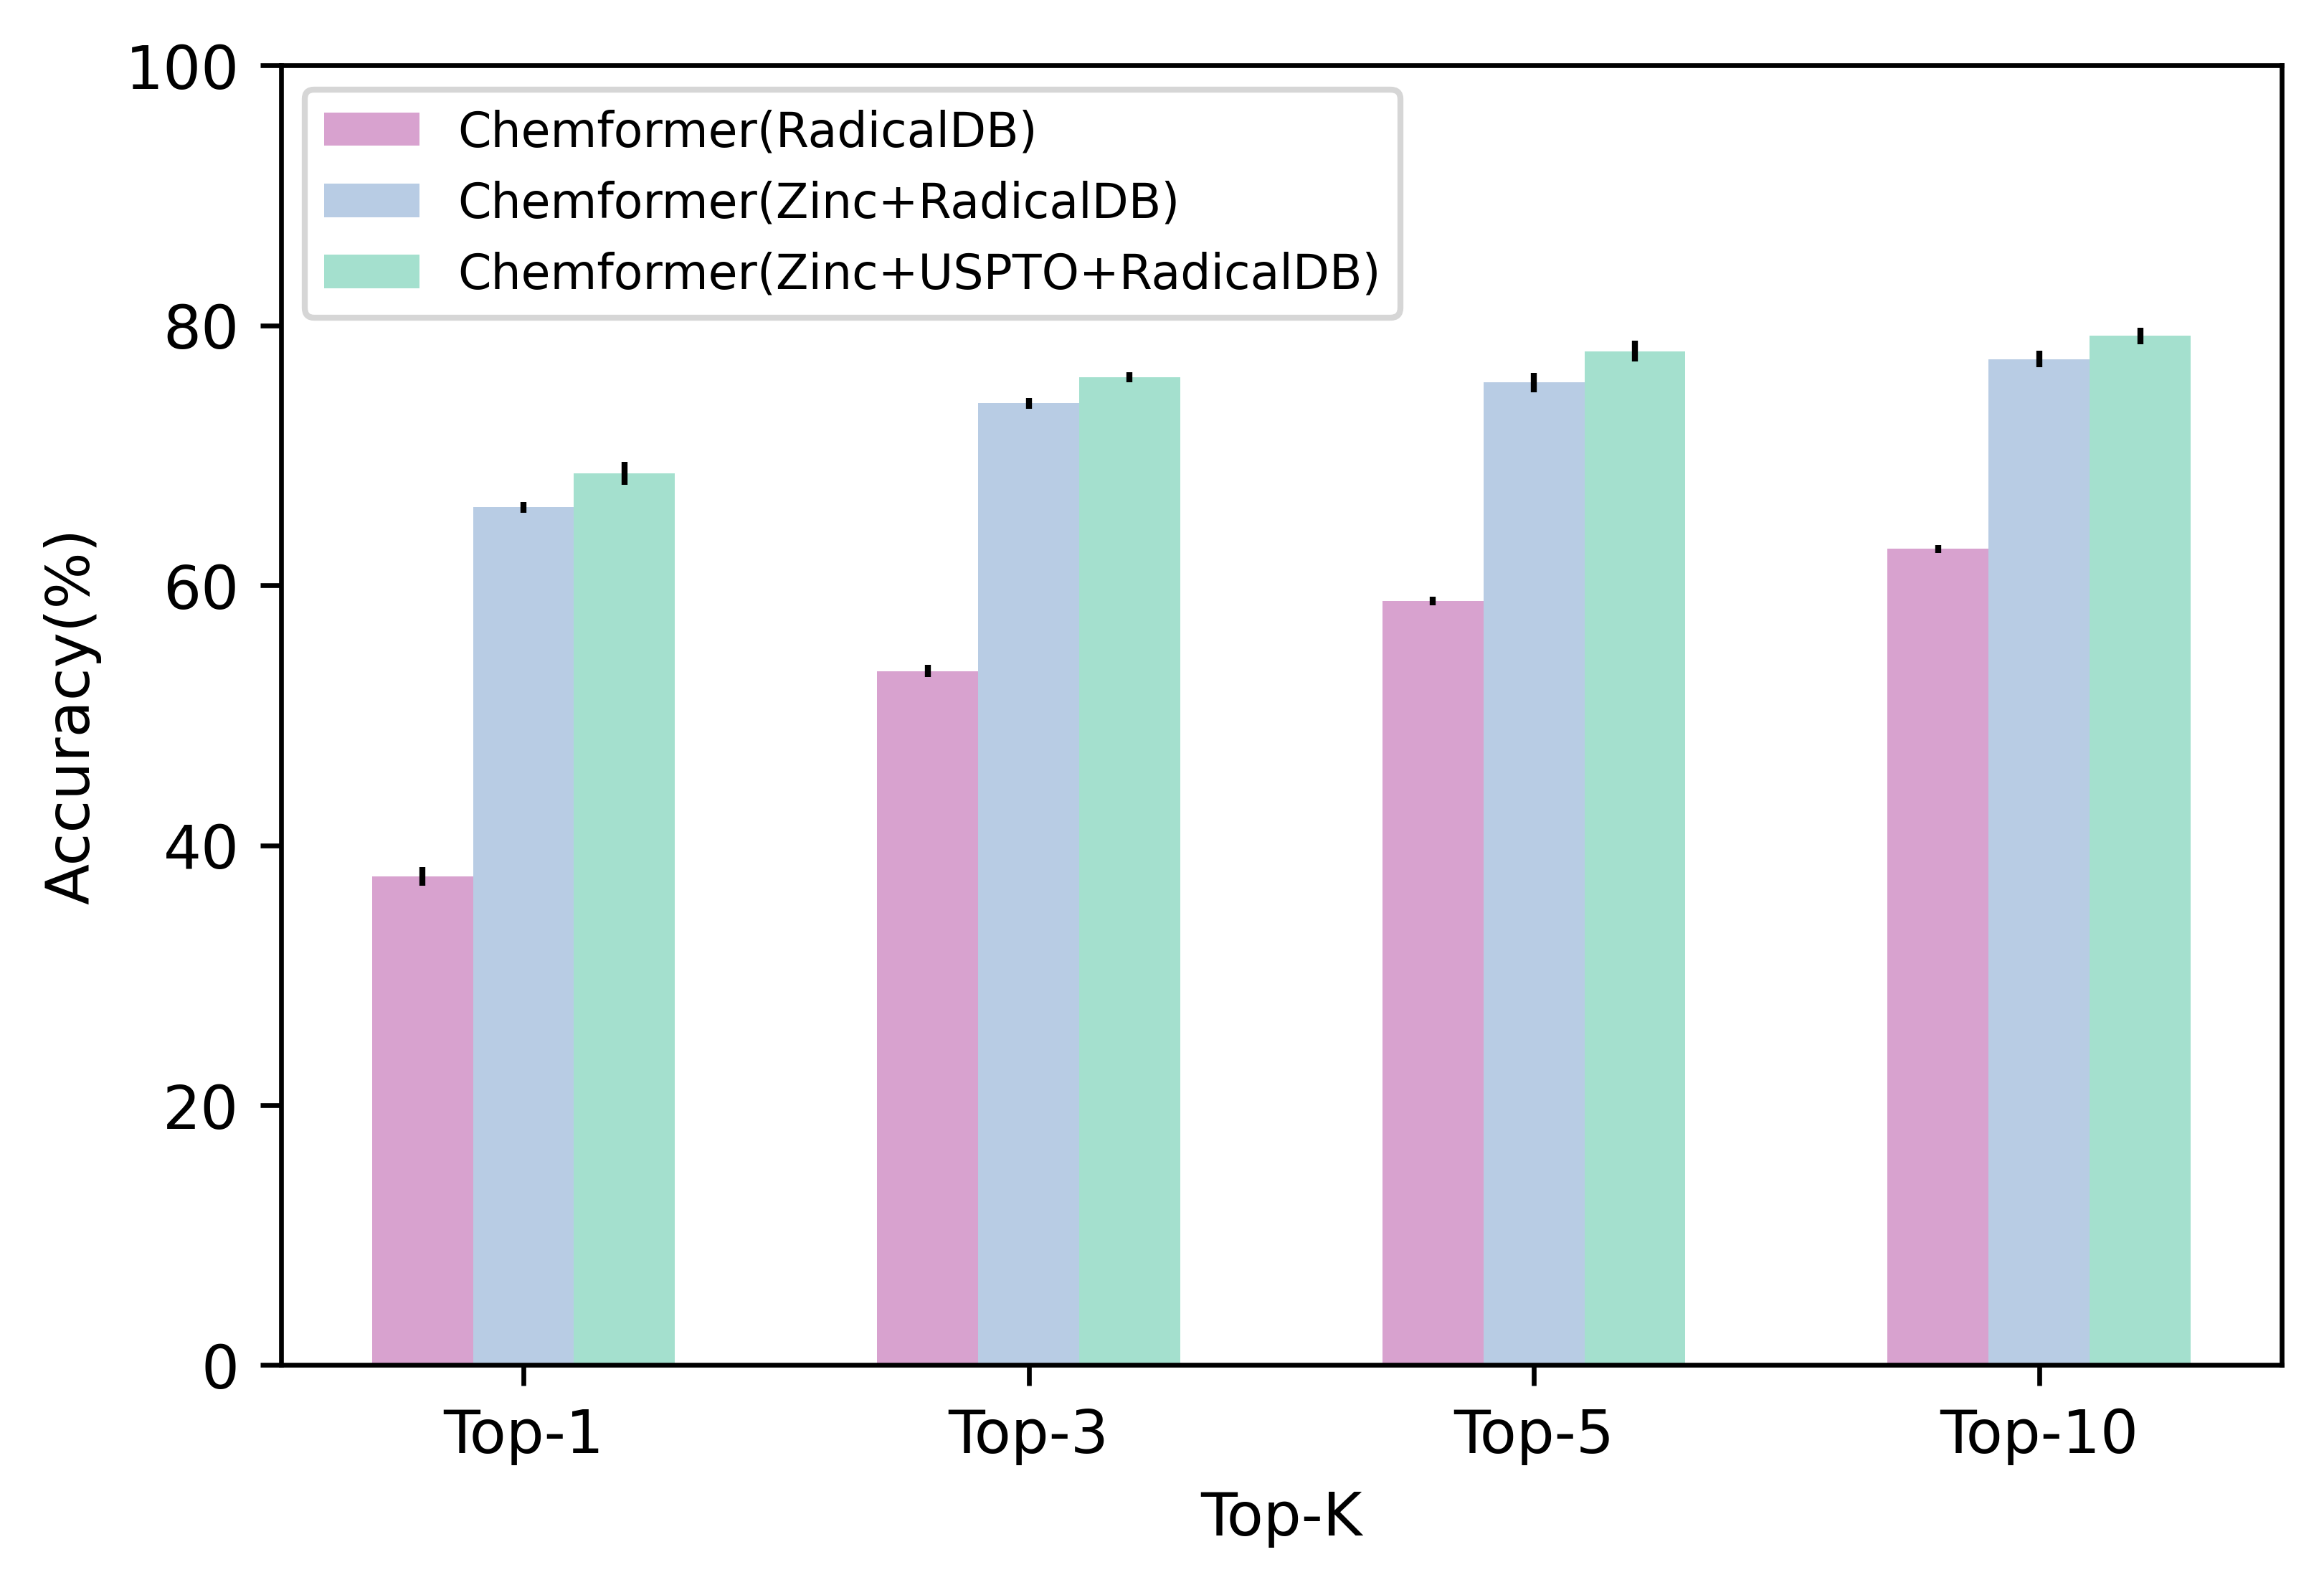

In [188]:
fig, ax = plt.subplots(dpi=600)
df_first = results_chemformer_pure_acc
df_secend = results_chemformer_mol_acc
df_third = results_chemformer_uspto_acc
first = df_first["mean"]
second = df_secend["mean"]
forth = df_third["mean"]

labels = [f"Top-{i}" for i in [1, 3, 5, 10]]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.2  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - 1 * width, first, width, label="Chemformer(RadicalDB)", color=colors[0])
plt.bar(x, second, width, label="Chemformer(Zinc+RadicalDB)", color=colors[2])
plt.bar(x + 1 * width, forth, width, label="Chemformer(Zinc+USPTO+RadicalDB)", color=colors[3])

plt.errorbar(
    x - 1 * width,
    first,
    yerr=df_first["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x,
    second,
    yerr=df_secend["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x + 1 * width,
    forth,
    yerr=df_third["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol=False))
plt.ylabel("Accuracy(%)")
plt.xlabel("Top-K")
plt.ylim(0, 1)
# plt.yticks([0.1, 0.2, 0.3, 0.4 ,0.5 ,0.6 ,0.7, 0.8 , 0.9, 1.0])
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [175]:
def is_valid(smi: str, ignore=True):
    try:
        mol = AllChem.MolFromSmiles(smi)
        if mol is None:
            return False
        else:
            return True
    except Exception as e:
        if not ignore:
            print(f"Not valid: {e}")
        return False


def cononize(smi: str, ignore=True):
    """标准化

    Args:
        smi (str): 分子 SMILES

    Returns:
        _type_: None
    """
    try:
        return AllChem.MolToSmiles(
            AllChem.MolFromSmiles(smi), isomericSmiles=False, canonical=True
        )
    except Exception as e:
        if not ignore:
            print(f"Failed Canonizing: {e}")
        return None


def print_topn_acc(df, top_n, name=""):
    df = df.copy()
    n_correct = 0
    n_valid = 0
    top_n = top_n
    for i, row in tqdm(df.iterrows(), total=len(df)):
        src = cononize(row["src"])
        for j in range(top_n):
            if is_valid(row[f"prediction_{j}"]):
                n_valid += 1
        for k in range(top_n):
            if src == cononize(row[f"prediction_{k}"]):
                n_correct += 1
                break
    print("-------------->")
    print(f"top {top_n} acc:")
    print(f"valid rate: {n_valid / len(df) / top_n:.2f}")
    print(f"acc: {n_correct / len(df):.2f}")
    print("<--------------")
    return {"name": name, "topn": top_n, "acc": n_correct / len(df)}


class Results:
    def __init__(self, keys) -> None:
        self.data = {key: [] for key in keys}

    def update(self, item: dict):
        for k, v in item.items():
            self.data[k].append(v)
    @property
    def df(self):
        return pd.DataFrame(self.data)

In [176]:
DATA_DIR = Path("data")
ANALYSIS_DIR = DATA_DIR / "analysis"
df_raw = pd.read_csv(DATA_DIR / "data.csv")
df_pred = pd.read_pickle(ANALYSIS_DIR / 'src_pred.pickle')
df_src = pd.read_csv(ANALYSIS_DIR / 'src.txt', names=["src"])
assert len(df_raw) == len(df_pred) == len(df_src), "not the same length"
df = pd.concat([df_raw, df_pred, df_src], axis=1)

df_photo = df[df["cls"] == "Photo/Electro Chemistry"]
df_anti_photo = df[df["cls"] != "Photo/Electro Chemistry"]


results_photo = Results(["name", "topn", "acc"])
for i in [1, 3, 5, 10]:
    item = print_topn_acc(df_photo, top_n=i, name="photo")
    results_photo.update(
        item
    )

100%|██████████| 9440/9440 [00:05<00:00, 1600.45it/s]


-------------->
top 1 acc:
valid rate: 0.99
acc: 0.90
<--------------


100%|██████████| 9440/9440 [00:08<00:00, 1095.91it/s]


-------------->
top 3 acc:
valid rate: 0.99
acc: 0.94
<--------------


100%|██████████| 9440/9440 [00:11<00:00, 826.02it/s] 


-------------->
top 5 acc:
valid rate: 0.99
acc: 0.95
<--------------


100%|██████████| 9440/9440 [00:13<00:00, 711.53it/s] 

-------------->
top 10 acc:
valid rate: 0.99
acc: 0.95
<--------------


In [177]:
results_anti_photo = Results(["name", "topn", "acc"])
for i in [1, 3, 5, 10]:
    item = print_topn_acc(df_anti_photo, top_n=i)
    results_anti_photo.update(item)

100%|██████████| 8262/8262 [00:02<00:00, 3148.86it/s]


-------------->
top 1 acc:
valid rate: 0.97
acc: 0.81
<--------------


100%|██████████| 8262/8262 [00:03<00:00, 2098.89it/s]


-------------->
top 3 acc:
valid rate: 0.97
acc: 0.89
<--------------


100%|██████████| 8262/8262 [00:05<00:00, 1605.24it/s]


-------------->
top 5 acc:
valid rate: 0.97
acc: 0.90
<--------------


100%|██████████| 8262/8262 [00:08<00:00, 1023.54it/s]

-------------->
top 10 acc:
valid rate: 0.97
acc: 0.91
<--------------


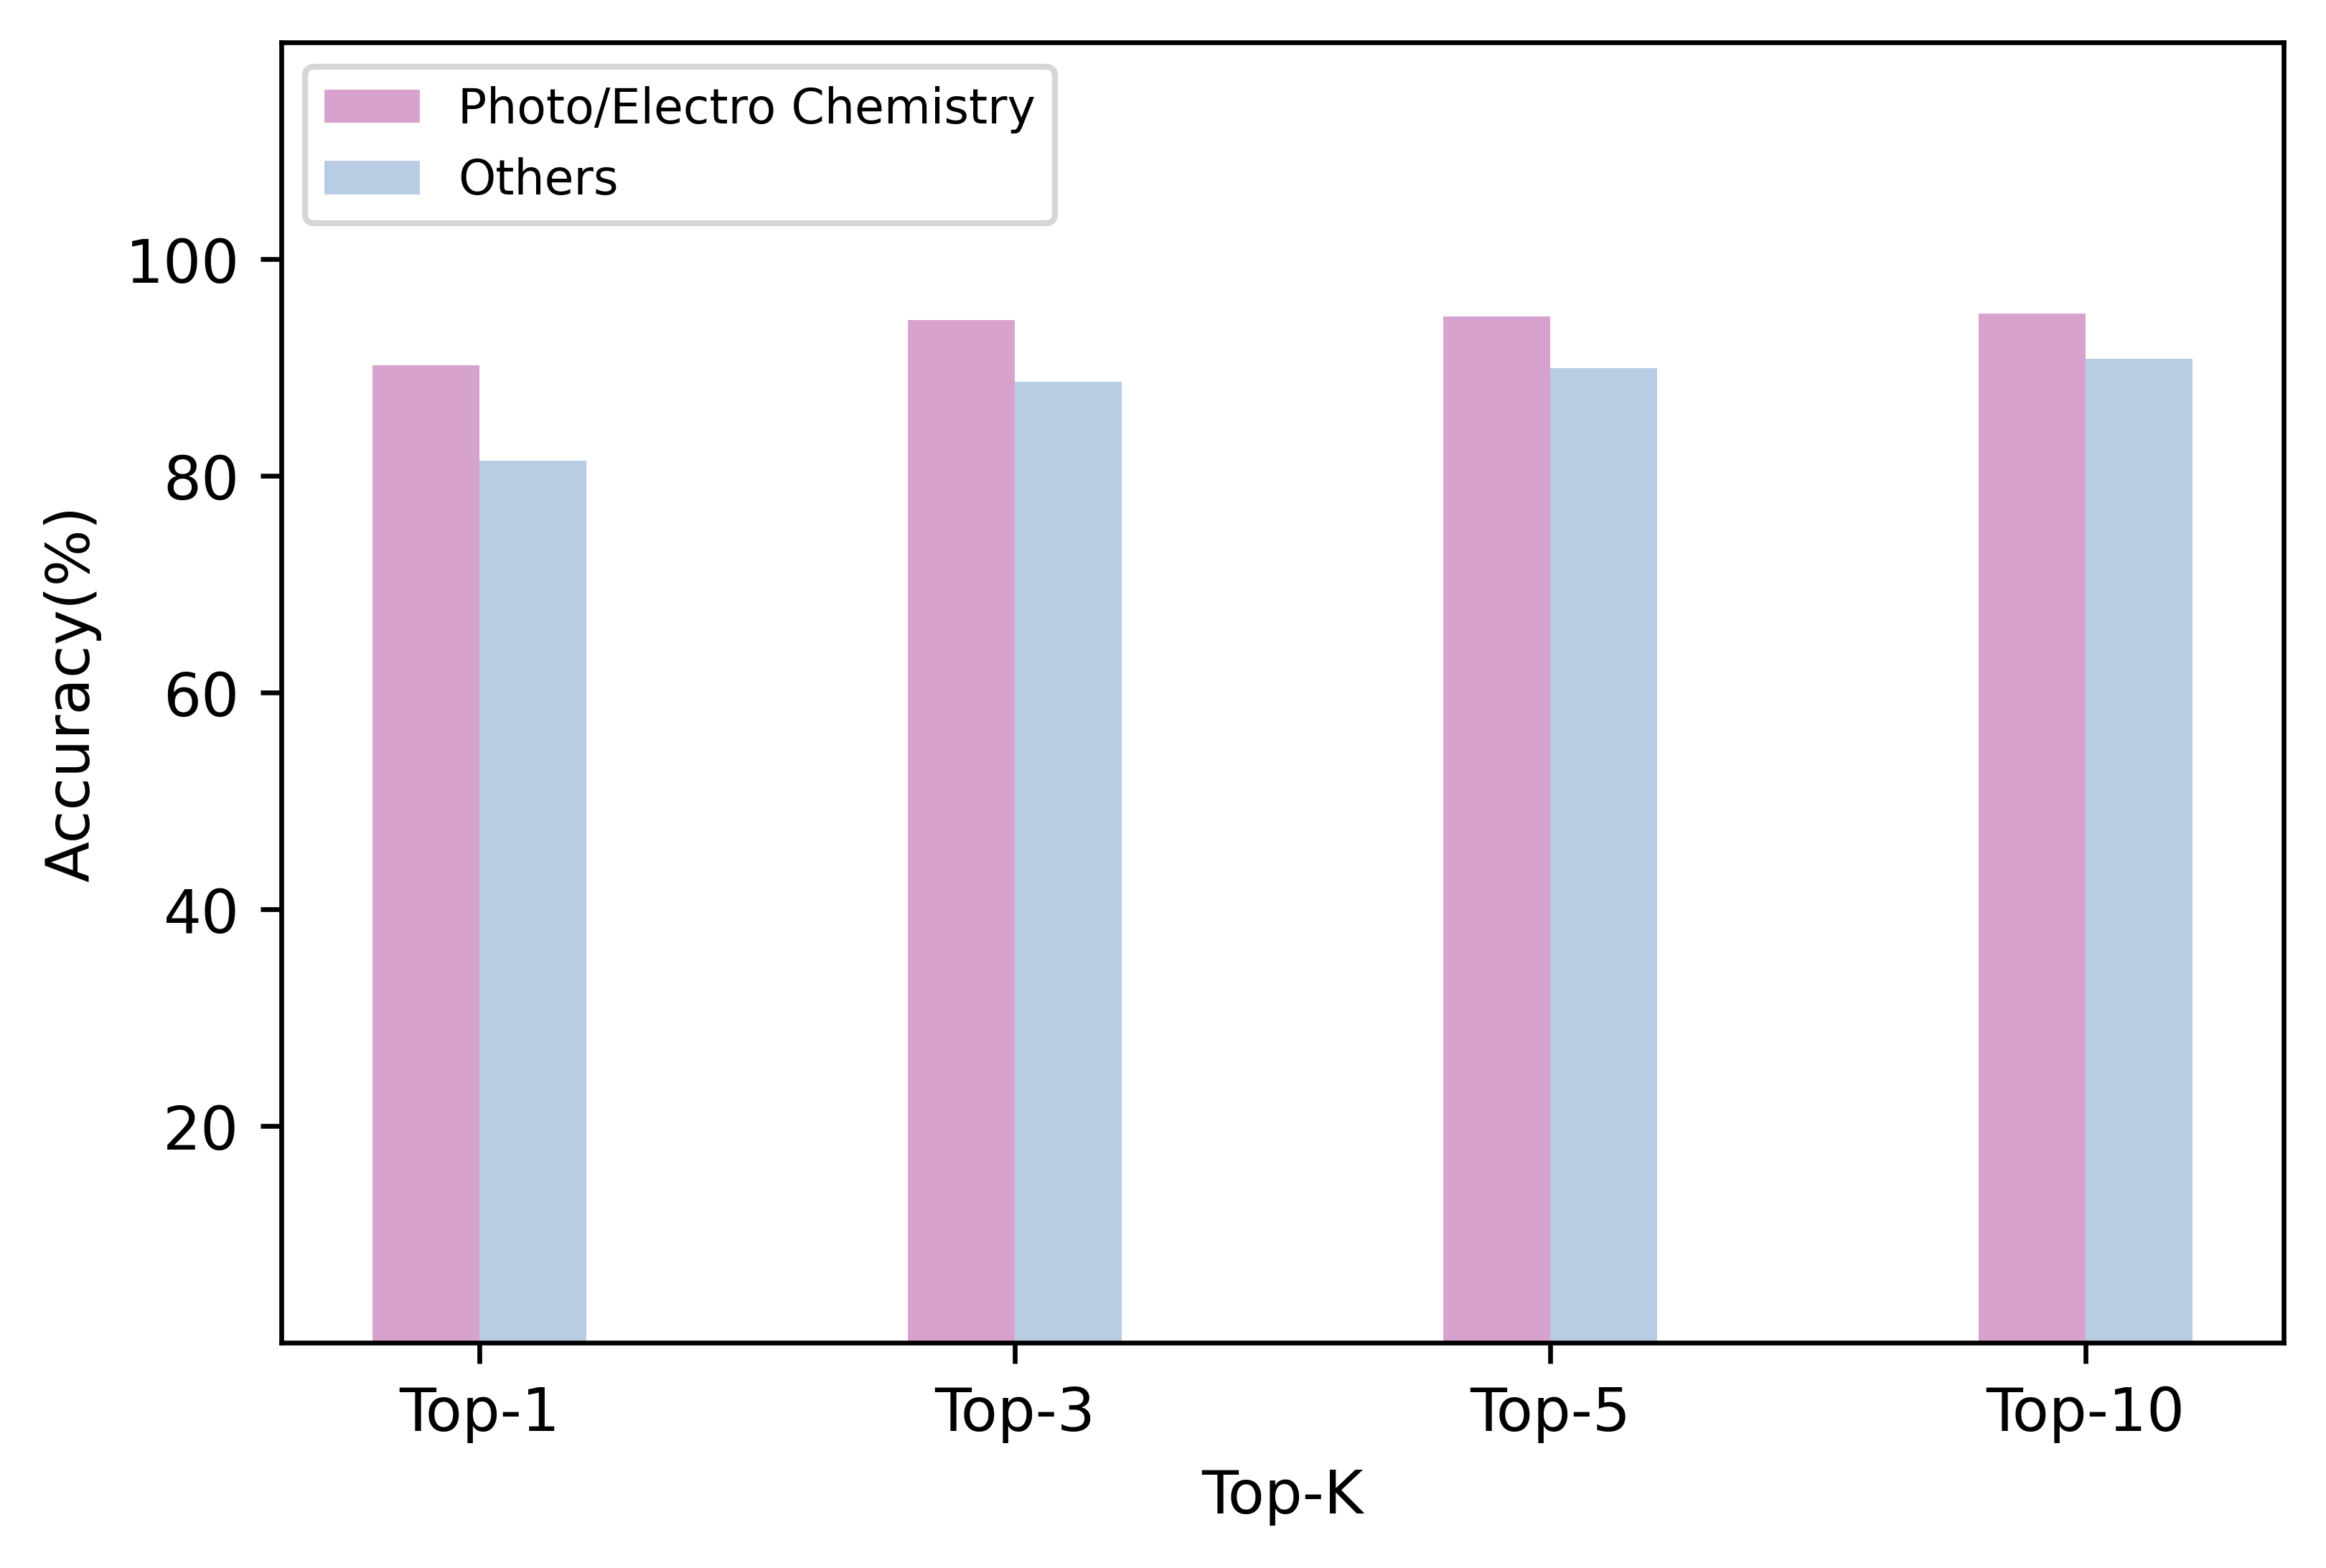

In [189]:
fig, ax = plt.subplots(dpi=600)
df_first = results_photo.df
df_second = results_anti_photo.df
first = df_first['acc']
second = df_second['acc']

labels = [f"Top-{i}" for i in [1, 3, 5, 10]]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.2  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - 0.5 * width, first, width, label="Photo/Electro Chemistry", color=colors[0])
plt.bar(x + 0.5 * width, second, width, label="Others", color=colors[2])

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol=False))
plt.ylabel("Accuracy(%)")
plt.xlabel("Top-K")
plt.ylim(0, 1.2)
# x轴刻度标签位置不进行计算
plt.yticks([0.2, 0.4, 0.6, 0.8, 1])
plt.xticks(x, labels=labels)

plt.legend(loc='upper left', fontsize=8)
plt.show()

In [179]:
results_names = {}
for rxn_name in ["Meerwein Arylation", "Minisci", "Faterno-Biichs", "Birch", "Barton-McCombie", "Giese"]:
    results_names[rxn_name] = Results(["name", "topn", "acc"])
    print(rxn_name)
    for i in [1, 3, 5, 10]:
        item = print_topn_acc(df[df["cls"] == rxn_name], top_n=i, name=rxn_name)
        results_names[rxn_name].update(item)

Meerwein Arylation


100%|██████████| 838/838 [00:00<00:00, 4103.00it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.94
<--------------


100%|██████████| 838/838 [00:00<00:00, 2870.17it/s]


-------------->
top 3 acc:
valid rate: 1.00
acc: 0.97
<--------------


100%|██████████| 838/838 [00:00<00:00, 2243.07it/s]


-------------->
top 5 acc:
valid rate: 1.00
acc: 0.97
<--------------


100%|██████████| 838/838 [00:00<00:00, 1475.85it/s]


-------------->
top 10 acc:
valid rate: 1.00
acc: 0.97
<--------------
Minisci


100%|██████████| 1727/1727 [00:00<00:00, 2892.12it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.83
<--------------


100%|██████████| 1727/1727 [00:00<00:00, 1892.20it/s]


-------------->
top 3 acc:
valid rate: 1.00
acc: 0.91
<--------------


100%|██████████| 1727/1727 [00:01<00:00, 1452.03it/s]


-------------->
top 5 acc:
valid rate: 1.00
acc: 0.93
<--------------


100%|██████████| 1727/1727 [00:01<00:00, 935.44it/s]


-------------->
top 10 acc:
valid rate: 1.00
acc: 0.94
<--------------
Faterno-Biichs


100%|██████████| 297/297 [00:00<00:00, 3233.43it/s]


-------------->
top 1 acc:
valid rate: 0.99
acc: 0.97
<--------------


100%|██████████| 297/297 [00:00<00:00, 2237.73it/s]


-------------->
top 3 acc:
valid rate: 0.99
acc: 0.98
<--------------


100%|██████████| 297/297 [00:00<00:00, 1739.79it/s]


-------------->
top 5 acc:
valid rate: 0.99
acc: 0.98
<--------------


100%|██████████| 297/297 [00:00<00:00, 1124.04it/s]


-------------->
top 10 acc:
valid rate: 0.99
acc: 0.98
<--------------
Birch


100%|██████████| 655/655 [00:00<00:00, 4082.72it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.92
<--------------


100%|██████████| 655/655 [00:00<00:00, 2714.62it/s]


-------------->
top 3 acc:
valid rate: 1.00
acc: 0.95
<--------------


100%|██████████| 655/655 [00:00<00:00, 2180.44it/s]


-------------->
top 5 acc:
valid rate: 1.00
acc: 0.95
<--------------


100%|██████████| 655/655 [00:00<00:00, 1427.24it/s]


-------------->
top 10 acc:
valid rate: 1.00
acc: 0.96
<--------------
Barton-McCombie


100%|██████████| 1254/1254 [00:00<00:00, 2830.82it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.82
<--------------


100%|██████████| 1254/1254 [00:00<00:00, 1872.97it/s]


-------------->
top 3 acc:
valid rate: 0.99
acc: 0.89
<--------------


100%|██████████| 1254/1254 [00:00<00:00, 1422.82it/s]


-------------->
top 5 acc:
valid rate: 0.99
acc: 0.90
<--------------


100%|██████████| 1254/1254 [00:01<00:00, 908.91it/s]


-------------->
top 10 acc:
valid rate: 0.99
acc: 0.92
<--------------
Giese


100%|██████████| 543/543 [00:00<00:00, 2933.46it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.90
<--------------


100%|██████████| 543/543 [00:00<00:00, 1976.74it/s]


-------------->
top 3 acc:
valid rate: 1.00
acc: 0.93
<--------------


100%|██████████| 543/543 [00:00<00:00, 1506.71it/s]


-------------->
top 5 acc:
valid rate: 1.00
acc: 0.94
<--------------


100%|██████████| 543/543 [00:00<00:00, 965.68it/s]

-------------->
top 10 acc:
valid rate: 1.00
acc: 0.94
<--------------


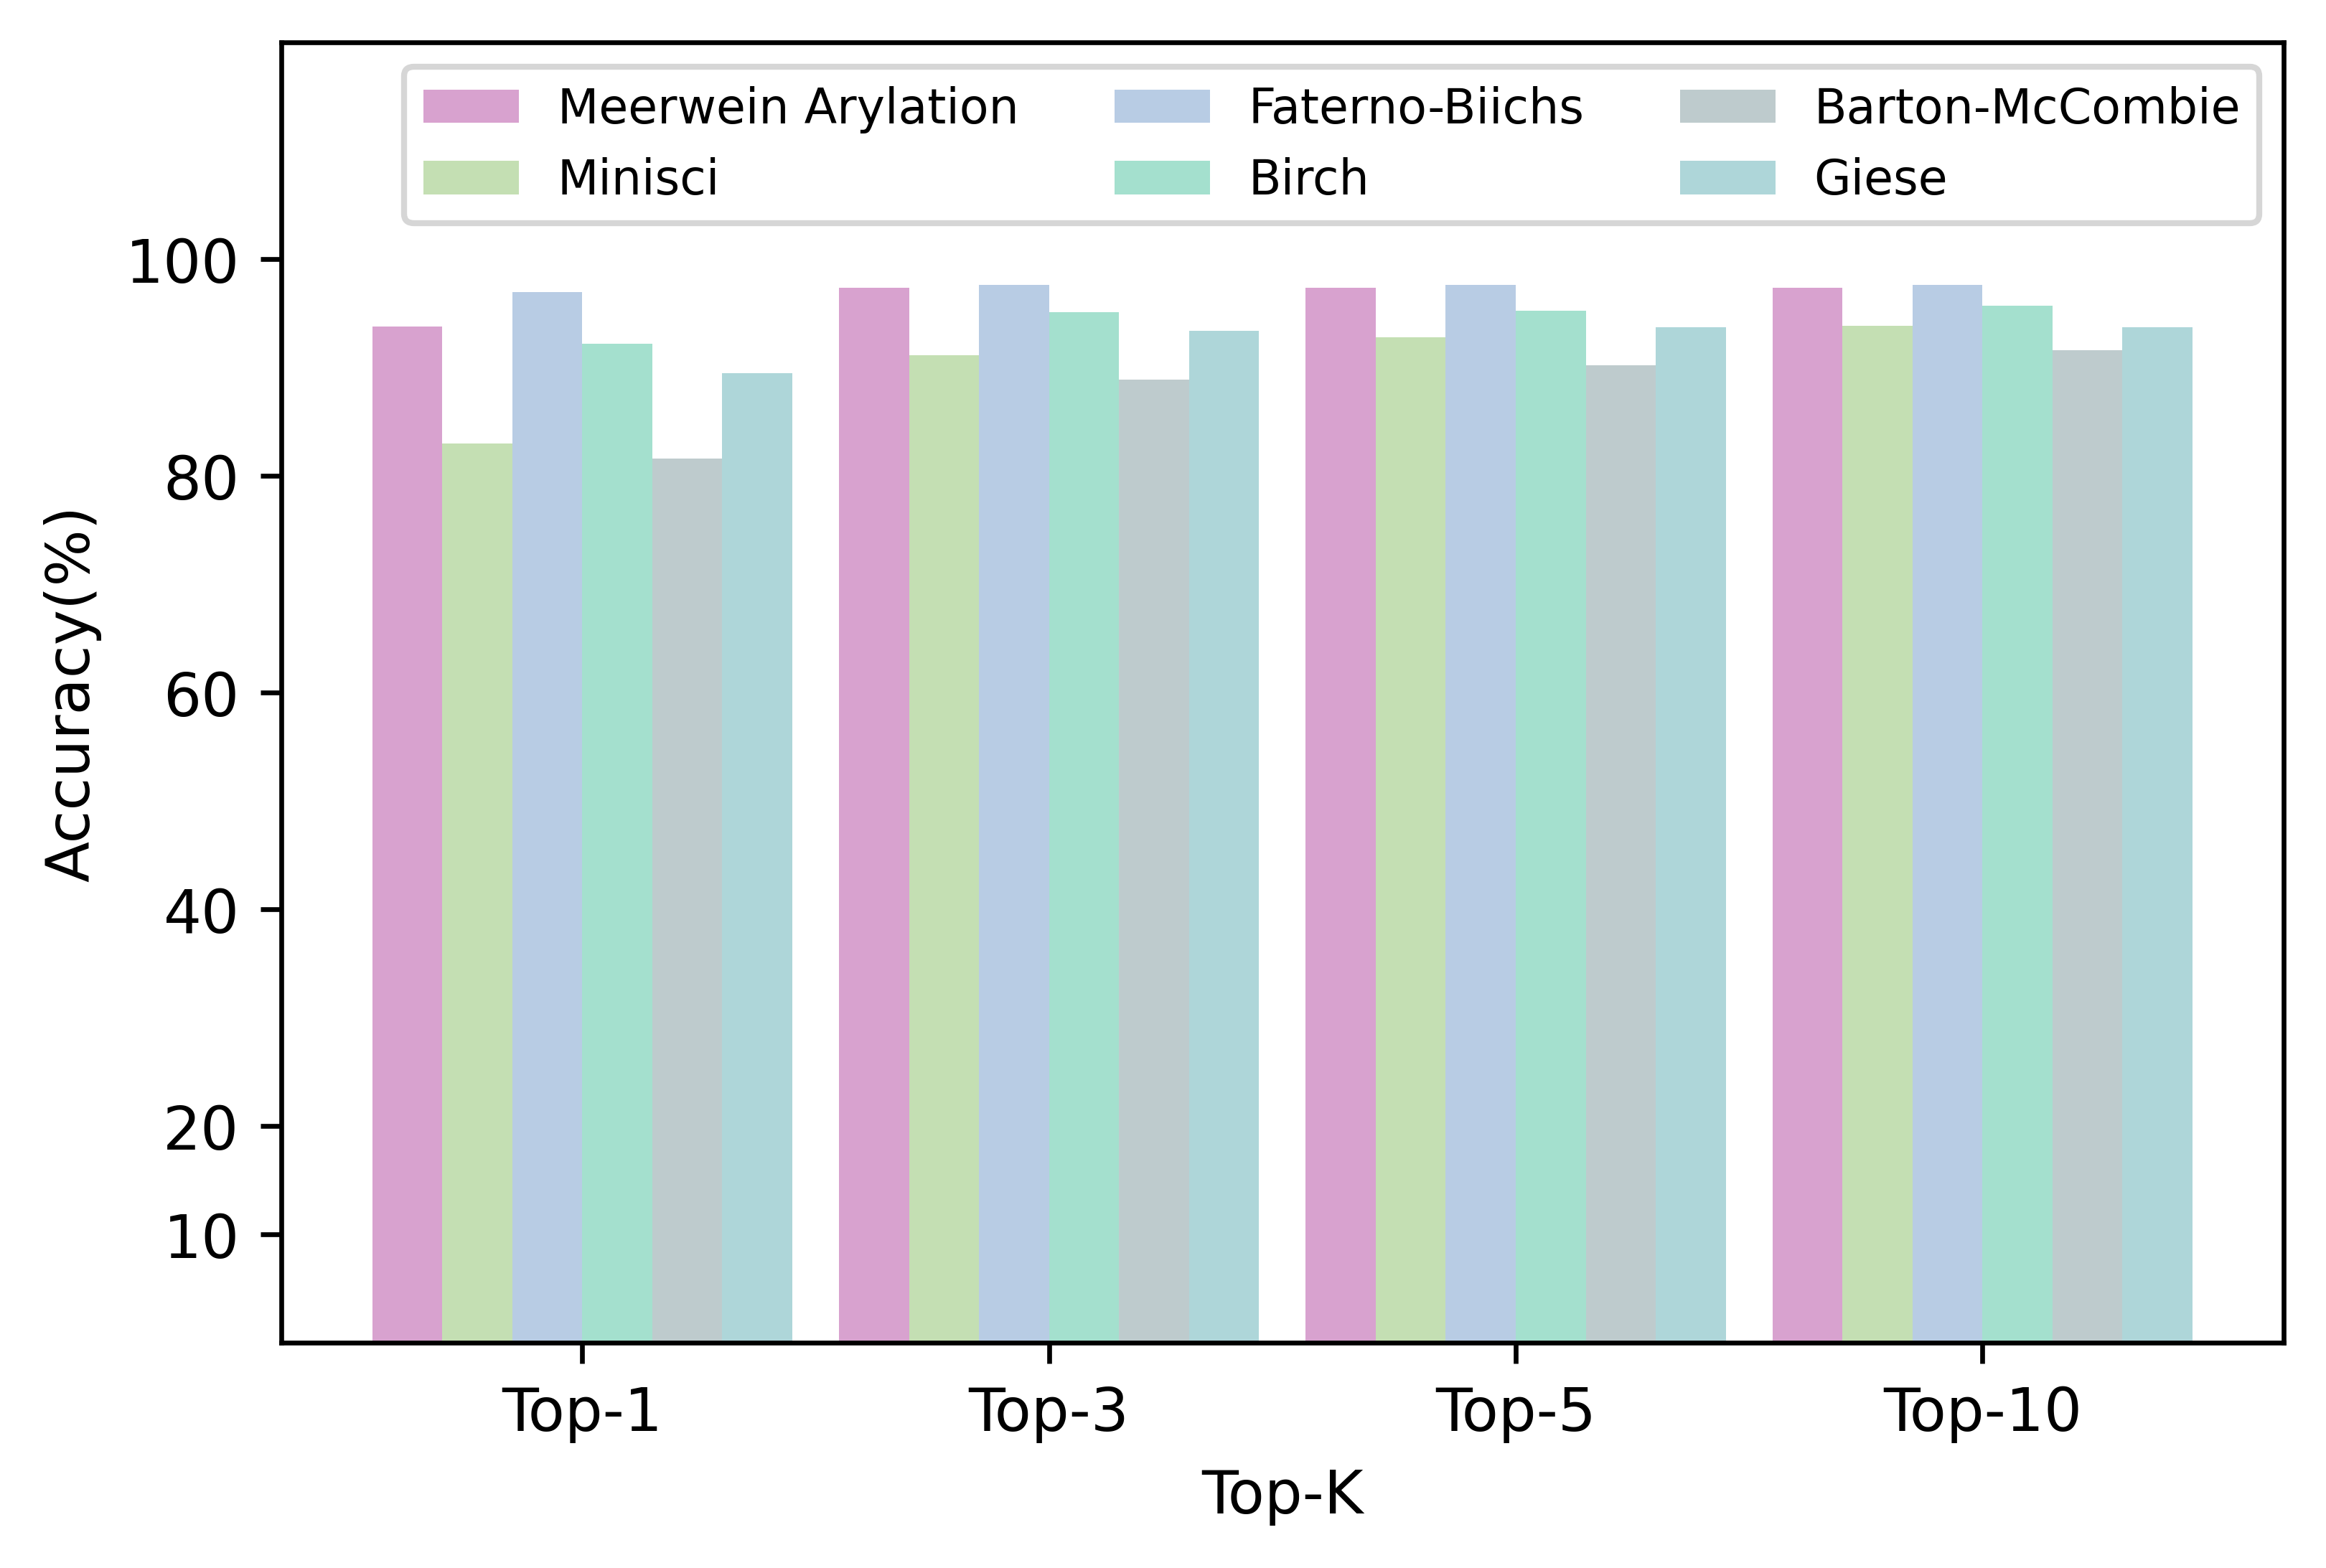

In [180]:
fig, ax = plt.subplots(dpi=600)

labels = [f"Top-{i}" for i in [1, 3, 5, 10]]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.15  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置

plt.bar(
    x - 2.5 * width,
    results_names["Meerwein Arylation"].df["acc"],
    width,
    label="Meerwein Arylation",
    color=colors[0],
)
plt.bar(
    x - 1.5 * width,
    results_names["Minisci"].df["acc"],
    width,
    label="Minisci",
    color=colors[1],
)
plt.bar(
    x - 0.5 * width,
    results_names["Faterno-Biichs"].df["acc"],
    width,
    label="Faterno-Biichs",
    color=colors[2],
)
plt.bar(
    x + 0.5 * width,
    results_names["Birch"].df["acc"],
    width,
    label="Birch",
    color=colors[3],
)
plt.bar(
    x + 1.5 * width,
    results_names["Barton-McCombie"].df["acc"],
    width,
    label="Barton-McCombie",
    color=colors[4],
)
plt.bar(
    x + 2.5 * width,
    results_names["Giese"].df["acc"],
    width,
    label="Giese",
    color=colors[5],
)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol=False))
plt.ylabel("Accuracy(%)")
plt.xlabel("Top-K")
plt.ylim(0, 1.2)
plt.yticks([0.1, 0.2, 0.4, 0.6, 0.8, 1])
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)

plt.legend(loc="best", fontsize=8, ncol=3)
plt.show()

In [181]:
df = pd.read_pickle("data/radicals/radicals_fold1.pkl")
reaction_type_list = df[df["set"] == "test"]["reaction_type"]

In [182]:
FOLD = 1

# with open(f"tmp/idx_fold{FOLD}.pkl", "rb") as f:
#     idx_test = pickle.load(f)
# df_raw_test = df_raw.iloc[idx_test, :]
df_pickle = pd.read_pickle("data/radicals/radicals_fold1.pkl")
df_raw_test = df_pickle[df_pickle["set"] == "test"].reset_index(drop=True)

df_pred_test = pd.read_pickle(
    DATA_DIR / "radicals" / f"radicals_fold{FOLD}_test_src_pred.pickle"
)
df_src_test = pd.read_csv(
    DATA_DIR / "radicals" / f"radicals_fold{FOLD}_test_src.txt", names=["src"]
)
assert len(df_raw_test) == len(df_pred_test) == len(df_src_test), "not the same length"
df_test = pd.concat([df_raw_test, df_pred_test, df_src_test], axis=1)

In [183]:
df_test_photo = df_test[df_test["reaction_type"] == "Photo/Electro Chemistry"]
df_test_anti_photo = df_test[df_test["reaction_type"] != "Photo/Electro Chemistry"]

results_test_photo = Results(["name", "topn", "acc"])
for i in [1, 3, 5, 10]:
    item = print_topn_acc(df_test_photo, top_n=i, name="photo_test")
    results_test_photo.update(item)

100%|██████████| 949/949 [00:00<00:00, 2564.33it/s]


-------------->
top 1 acc:
valid rate: 0.99
acc: 0.72
<--------------


100%|██████████| 949/949 [00:00<00:00, 1656.01it/s]


-------------->
top 3 acc:
valid rate: 0.98
acc: 0.79
<--------------


100%|██████████| 949/949 [00:00<00:00, 1242.47it/s]


-------------->
top 5 acc:
valid rate: 0.98
acc: 0.81
<--------------


100%|██████████| 949/949 [00:01<00:00, 772.00it/s]

-------------->
top 10 acc:
valid rate: 0.98
acc: 0.81
<--------------


In [184]:
results_test_anti_photo = Results(["name", "topn", "acc"])
for i in [1, 3, 5, 10]:
    item = print_topn_acc(df_test_anti_photo, top_n=i, name="anti_photo_test")
    results_test_anti_photo.update(item)

100%|██████████| 811/811 [00:00<00:00, 2886.27it/s]


-------------->
top 1 acc:
valid rate: 0.97
acc: 0.62
<--------------


100%|██████████| 811/811 [00:00<00:00, 1789.80it/s]


-------------->
top 3 acc:
valid rate: 0.97
acc: 0.72
<--------------


100%|██████████| 811/811 [00:00<00:00, 1339.37it/s]


-------------->
top 5 acc:
valid rate: 0.97
acc: 0.74
<--------------


100%|██████████| 811/811 [00:00<00:00, 844.39it/s] 

-------------->
top 10 acc:
valid rate: 0.96
acc: 0.76
<--------------


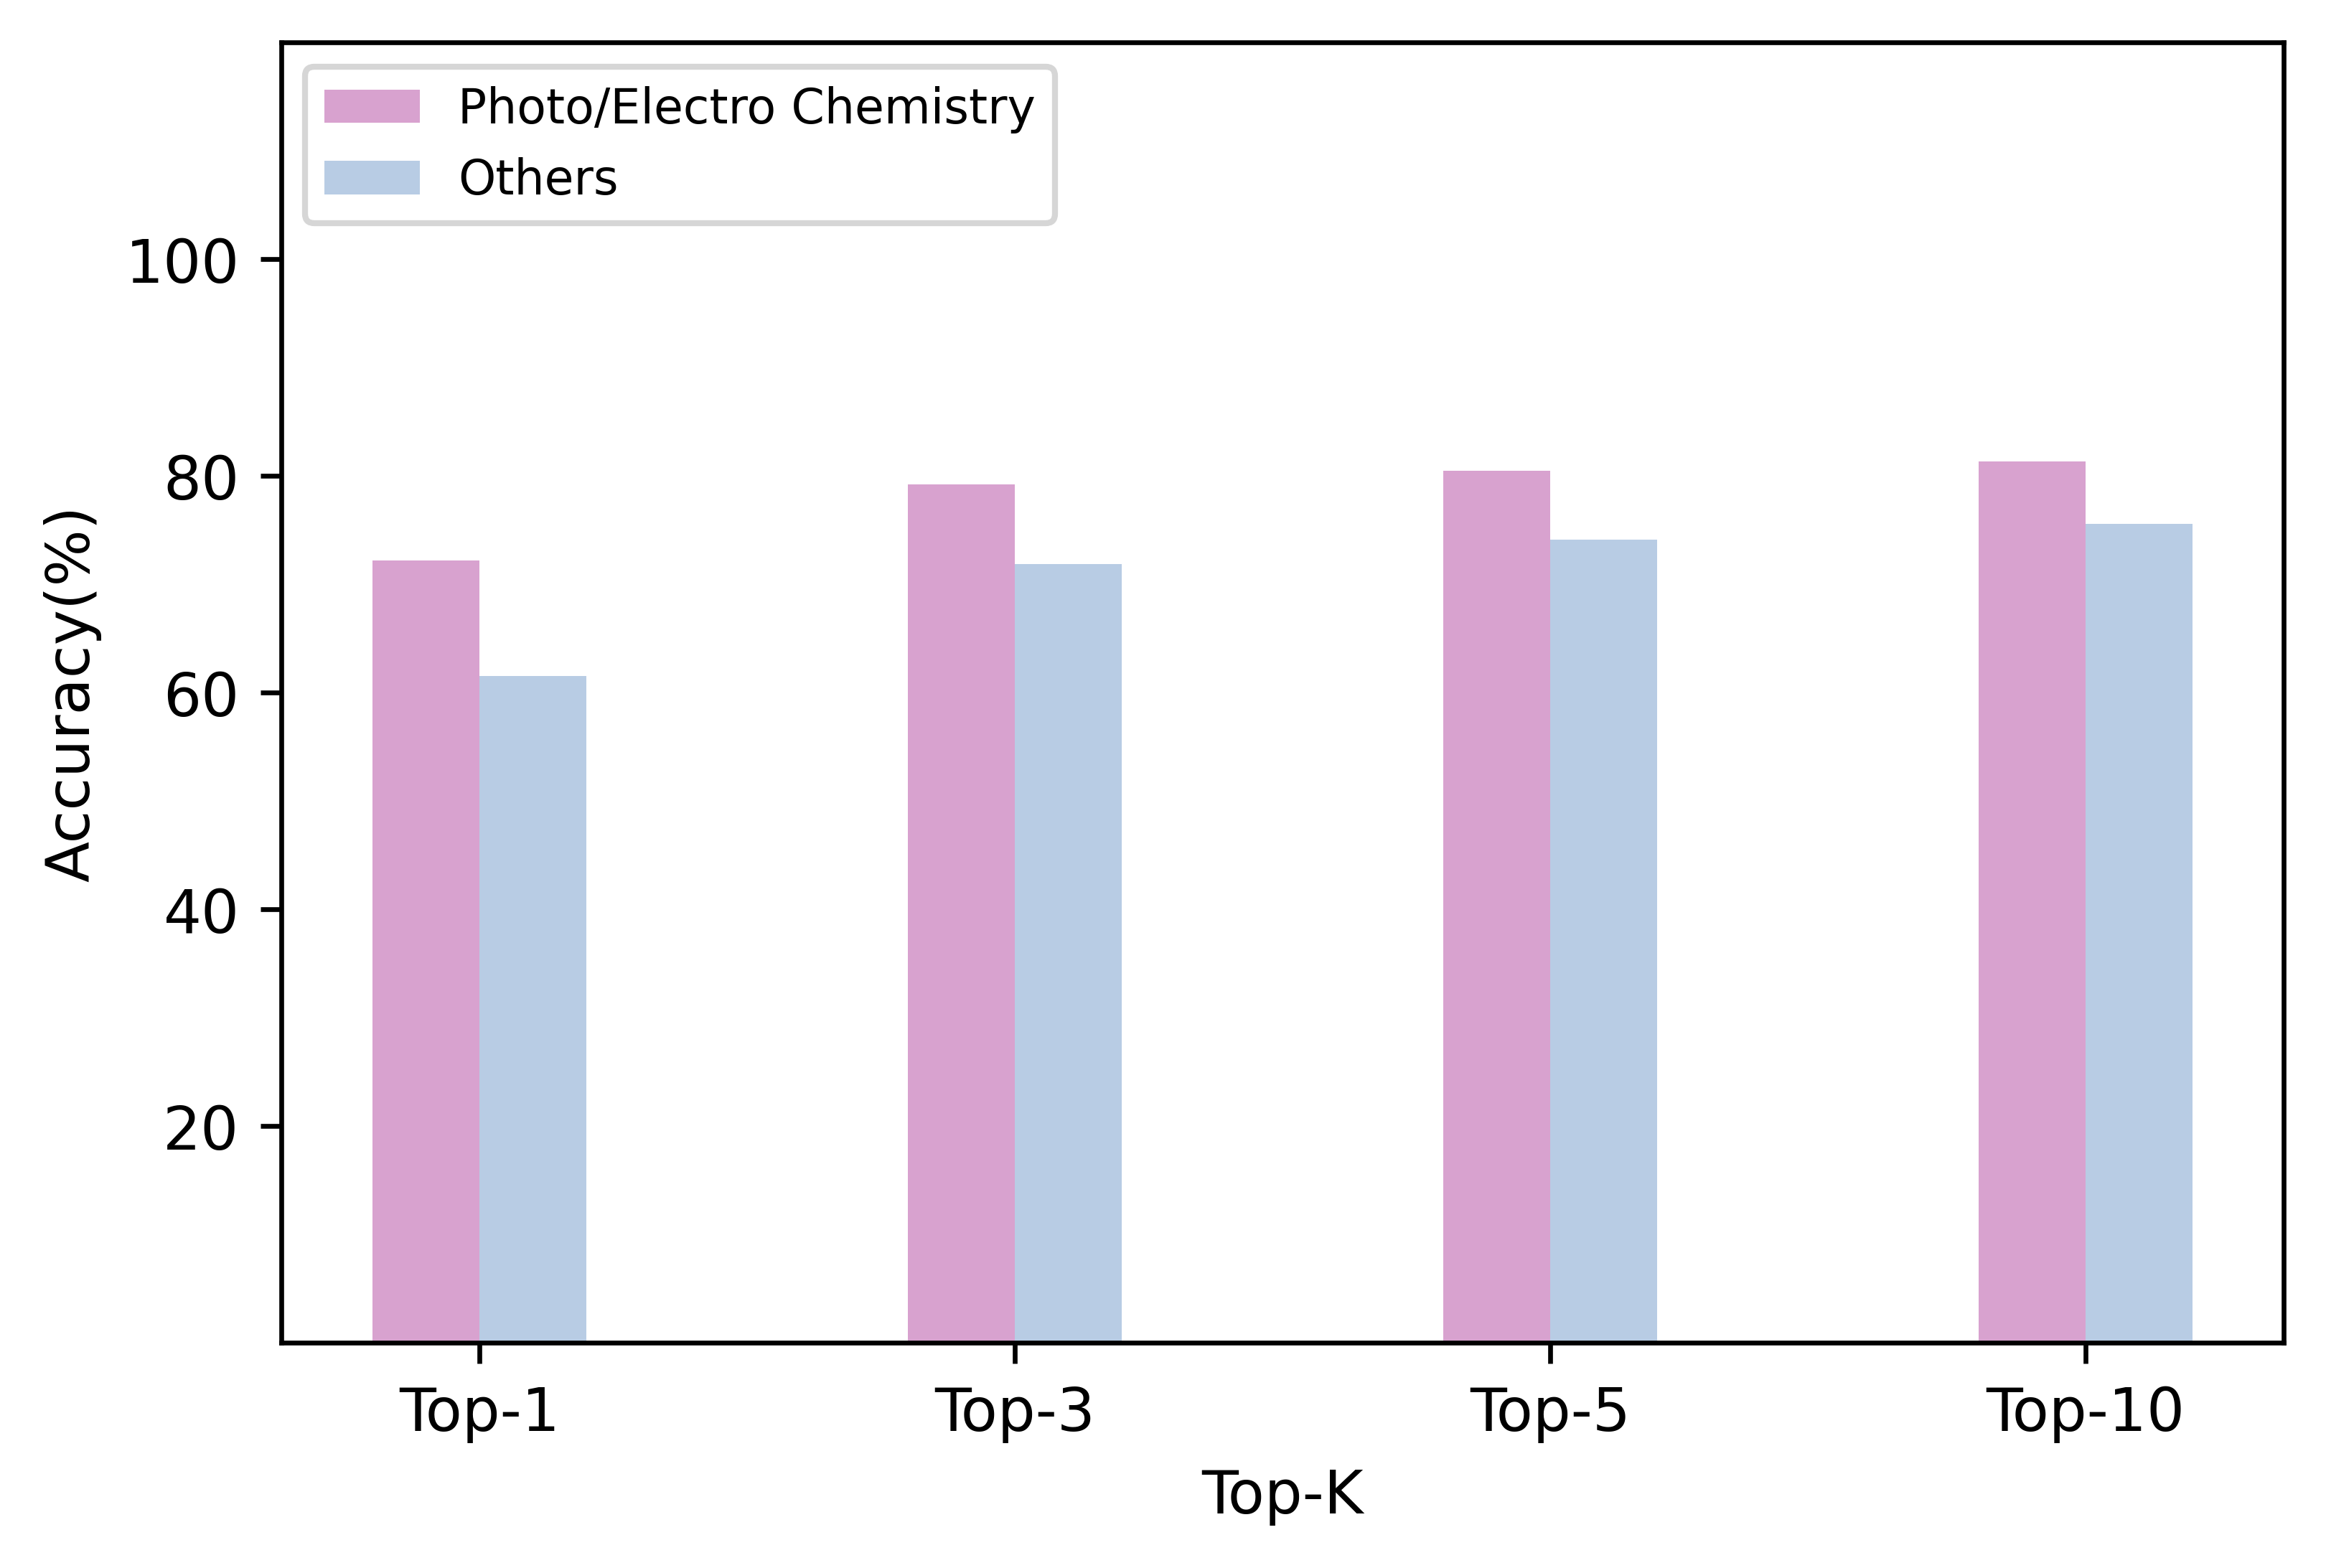

In [191]:
fig, ax = plt.subplots(dpi=600)
df_first = results_test_photo.df
df_second = results_test_anti_photo.df
first = df_first['acc']
second = df_second['acc']

labels = [f"Top-{i}" for i in [1, 3, 5, 10]]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.2  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - 0.5 * width, first, width, label="Photo/Electro Chemistry", color=colors[0])
plt.bar(x + 0.5 * width, second, width, label="Others", color=colors[2])

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol=False))
plt.ylabel("Accuracy(%)")
plt.xlabel("Top-K")
plt.ylim(0, 1.2)
# x轴刻度标签位置不进行计算
plt.yticks([0.2, 0.4, 0.6, 0.8, 1])
plt.xticks(x, labels=labels)

plt.legend(loc='upper left', fontsize=8)
plt.show()

In [186]:
results_test_names = {}
for rxn_name in ["Meerwein Arylation", "Minisci", "Faterno-Biichs", "Birch", "Barton-McCombie", "Giese"]:
    results_test_names[rxn_name] = Results(["name", "topn", "acc"])
    print(rxn_name)
    for i in [1, 3, 5, 10]:
        item = print_topn_acc(df_test[df_test["reaction_type"] == rxn_name], top_n=i, name=rxn_name)
        results_test_names[rxn_name].update(item)

Meerwein Arylation


100%|██████████| 83/83 [00:00<00:00, 3656.38it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.86
<--------------


100%|██████████| 83/83 [00:00<00:00, 2662.32it/s]


-------------->
top 3 acc:
valid rate: 1.00
acc: 0.92
<--------------


100%|██████████| 83/83 [00:00<00:00, 2025.34it/s]


-------------->
top 5 acc:
valid rate: 1.00
acc: 0.92
<--------------


100%|██████████| 83/83 [00:00<00:00, 1332.39it/s]


-------------->
top 10 acc:
valid rate: 1.00
acc: 0.93
<--------------
Minisci


100%|██████████| 182/182 [00:00<00:00, 2607.35it/s]


-------------->
top 1 acc:
valid rate: 0.99
acc: 0.65
<--------------


100%|██████████| 182/182 [00:00<00:00, 1686.80it/s]


-------------->
top 3 acc:
valid rate: 0.99
acc: 0.79
<--------------


100%|██████████| 182/182 [00:00<00:00, 1254.54it/s]


-------------->
top 5 acc:
valid rate: 0.99
acc: 0.83
<--------------


100%|██████████| 182/182 [00:00<00:00, 795.46it/s]


-------------->
top 10 acc:
valid rate: 1.00
acc: 0.85
<--------------
Faterno-Biichs


100%|██████████| 33/33 [00:00<00:00, 3031.23it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.94
<--------------


100%|██████████| 33/33 [00:00<00:00, 2070.39it/s]


-------------->
top 3 acc:
valid rate: 0.98
acc: 0.94
<--------------


100%|██████████| 33/33 [00:00<00:00, 1655.61it/s]


-------------->
top 5 acc:
valid rate: 0.97
acc: 0.94
<--------------


100%|██████████| 33/33 [00:00<00:00, 1088.68it/s]


-------------->
top 10 acc:
valid rate: 0.95
acc: 0.94
<--------------
Birch


100%|██████████| 61/61 [00:00<00:00, 3840.65it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.70
<--------------


100%|██████████| 61/61 [00:00<00:00, 2363.25it/s]


-------------->
top 3 acc:
valid rate: 0.99
acc: 0.77
<--------------


100%|██████████| 61/61 [00:00<00:00, 1758.80it/s]


-------------->
top 5 acc:
valid rate: 0.98
acc: 0.79
<--------------


100%|██████████| 61/61 [00:00<00:00, 1062.69it/s]


-------------->
top 10 acc:
valid rate: 0.98
acc: 0.79
<--------------
Barton-McCombie


100%|██████████| 128/128 [00:00<00:00, 2614.05it/s]


-------------->
top 1 acc:
valid rate: 0.98
acc: 0.42
<--------------


100%|██████████| 128/128 [00:00<00:00, 1528.97it/s]


-------------->
top 3 acc:
valid rate: 0.97
acc: 0.50
<--------------


100%|██████████| 128/128 [00:00<00:00, 1114.30it/s]


-------------->
top 5 acc:
valid rate: 0.97
acc: 0.54
<--------------


100%|██████████| 128/128 [00:00<00:00, 651.39it/s]


-------------->
top 10 acc:
valid rate: 0.96
acc: 0.57
<--------------
Giese


100%|██████████| 47/47 [00:00<00:00, 2471.01it/s]


-------------->
top 1 acc:
valid rate: 1.00
acc: 0.74
<--------------


100%|██████████| 47/47 [00:00<00:00, 1511.62it/s]


-------------->
top 3 acc:
valid rate: 0.99
acc: 0.81
<--------------


100%|██████████| 47/47 [00:00<00:00, 1163.15it/s]


-------------->
top 5 acc:
valid rate: 1.00
acc: 0.83
<--------------


100%|██████████| 47/47 [00:00<00:00, 717.00it/s]

-------------->
top 10 acc:
valid rate: 0.99
acc: 0.85
<--------------


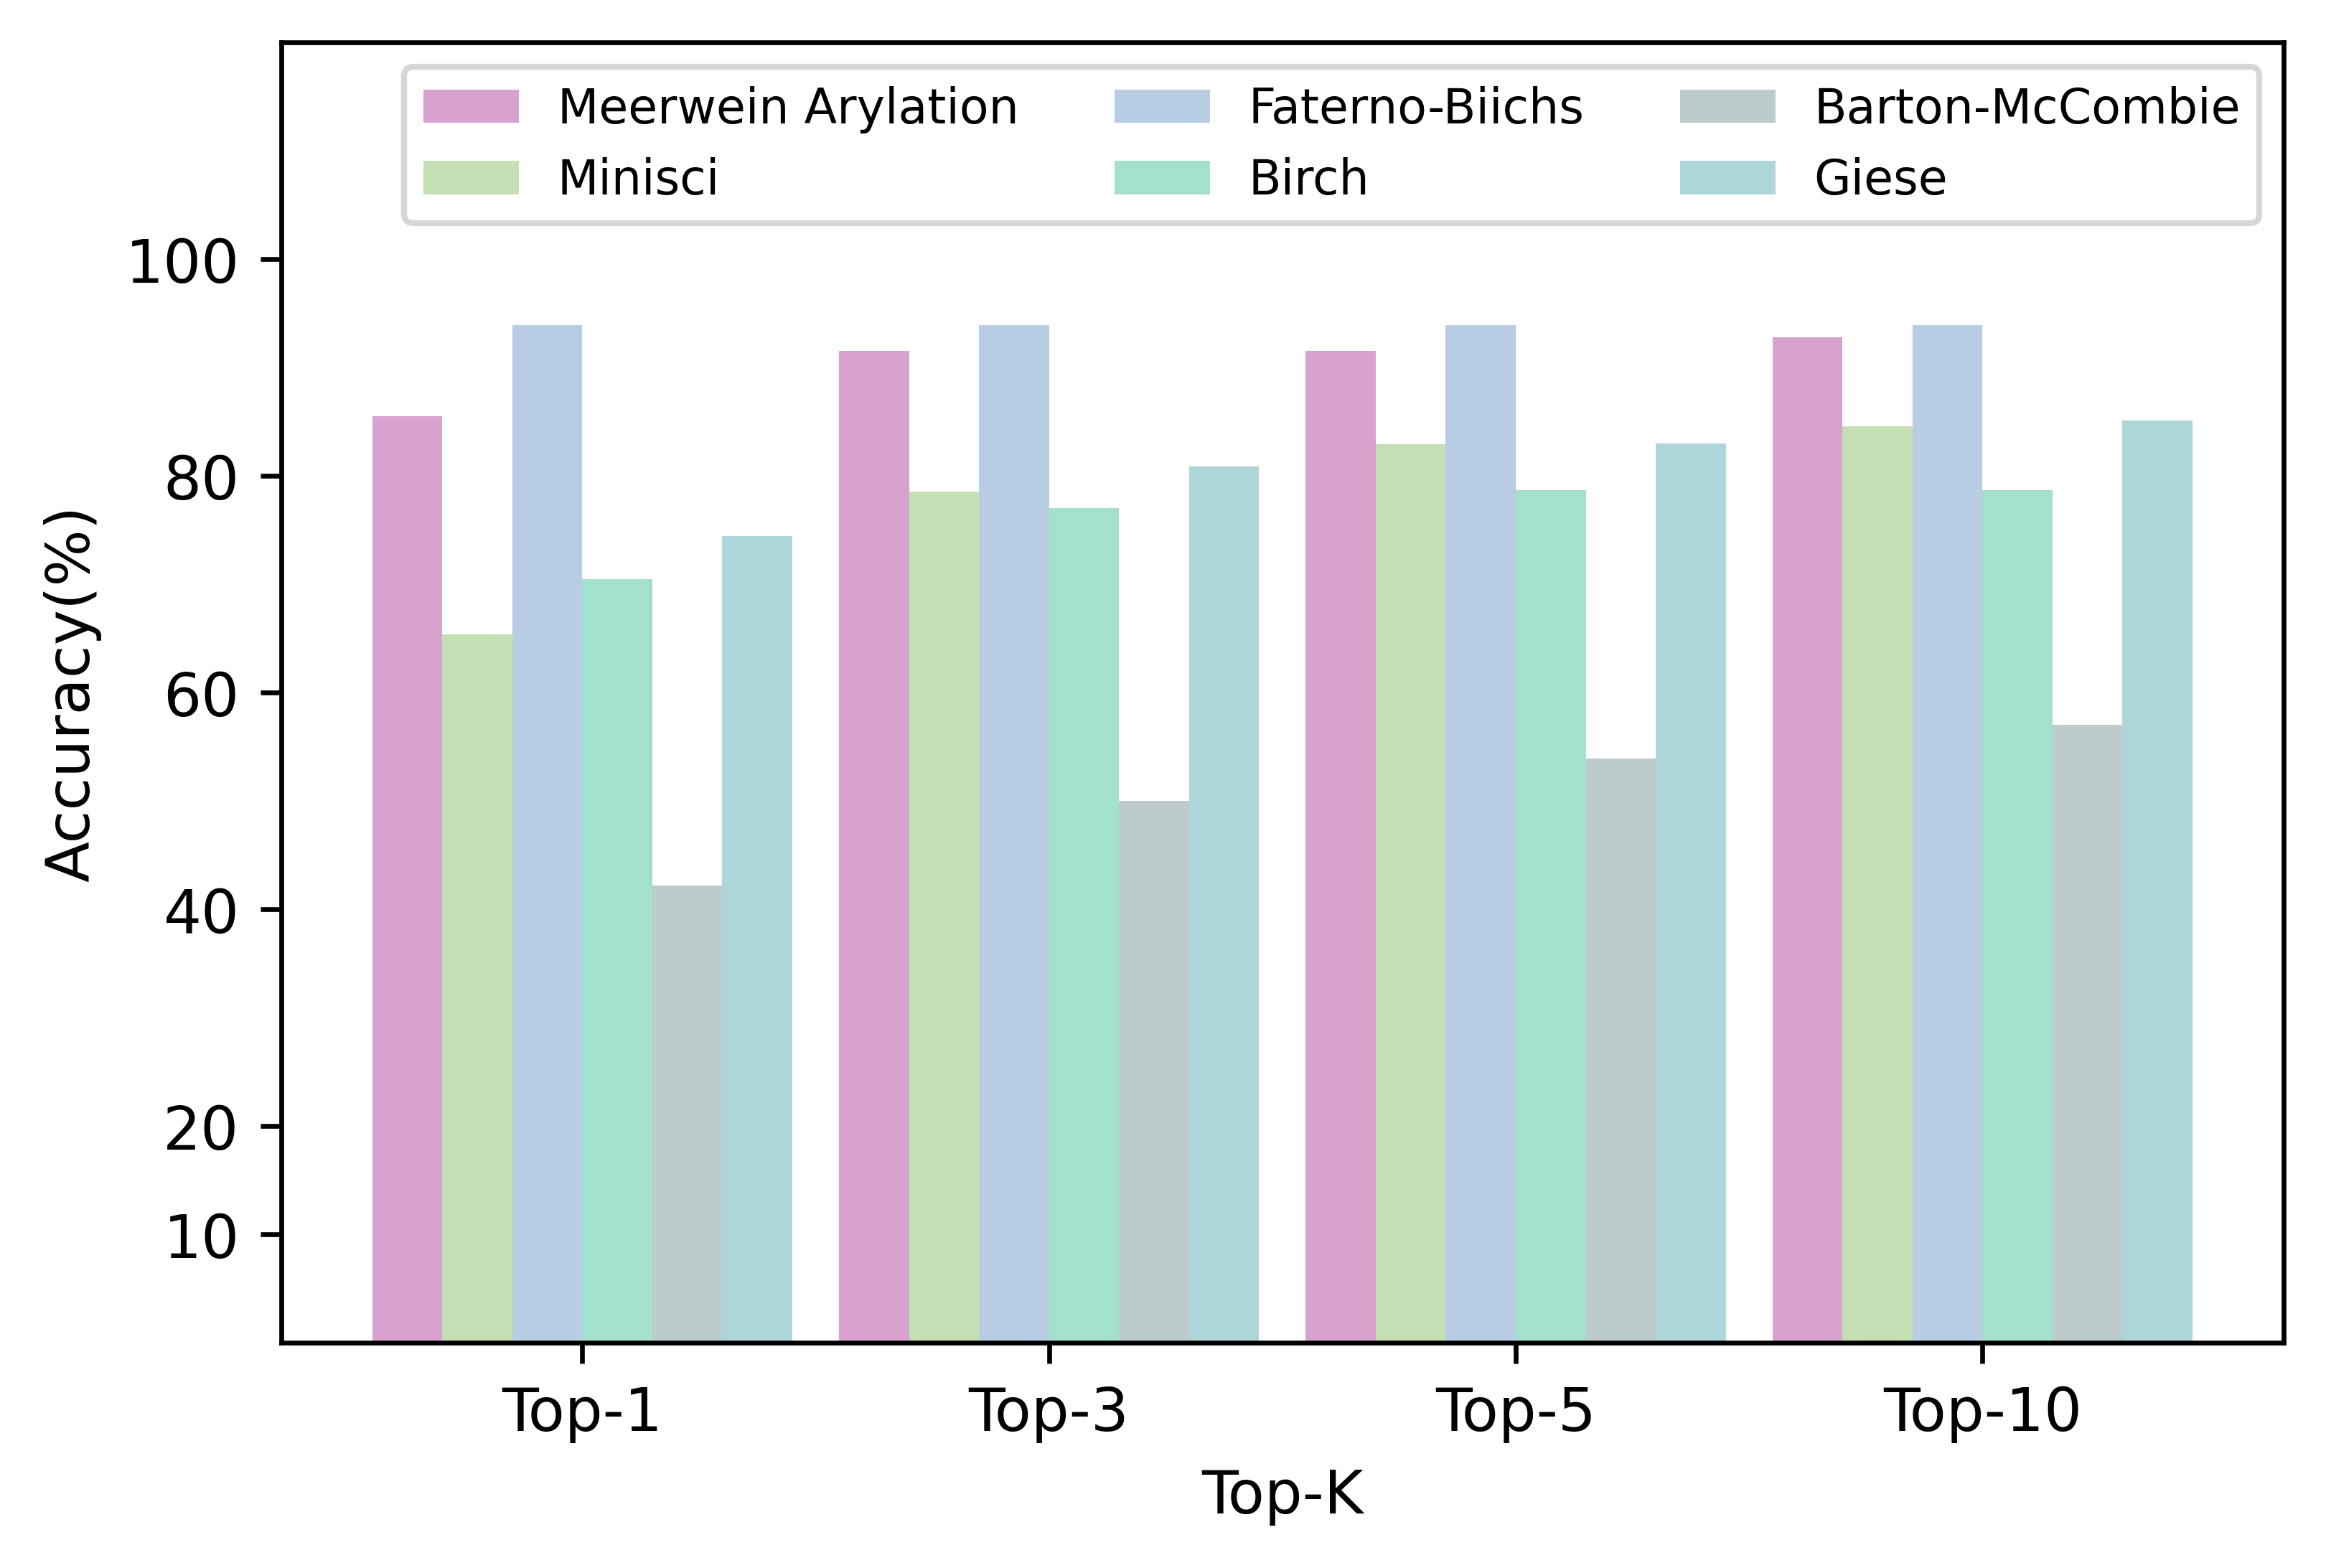

In [187]:
fig, ax = plt.subplots(dpi=600)

labels = [f"Top-{i}" for i in [1, 3, 5, 10]]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.15  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置

plt.bar(
    x - 2.5 * width,
    results_test_names["Meerwein Arylation"].df["acc"],
    width,
    label="Meerwein Arylation",
    color=colors[0],
)
plt.bar(
    x - 1.5 * width,
    results_test_names["Minisci"].df["acc"],
    width,
    label="Minisci",
    color=colors[1],
)
plt.bar(
    x - 0.5 * width,
    results_test_names["Faterno-Biichs"].df["acc"],
    width,
    label="Faterno-Biichs",
    color=colors[2],
)
plt.bar(
    x + 0.5 * width,
    results_test_names["Birch"].df["acc"],
    width,
    label="Birch",
    color=colors[3],
)
plt.bar(
    x + 1.5 * width,
    results_test_names["Barton-McCombie"].df["acc"],
    width,
    label="Barton-McCombie",
    color=colors[4],
)
plt.bar(
    x + 2.5 * width,
    results_test_names["Giese"].df["acc"],
    width,
    label="Giese",
    color=colors[5],
)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol=False))
plt.ylabel("Accuracy(%)")
plt.xlabel("Top-K")
plt.ylim(0, 1.2)
plt.yticks([0.1, 0.2, 0.4, 0.6, 0.8, 1])
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)

plt.legend(loc="best", fontsize=8, ncol=3)
plt.show()